In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Import libraries

In [2]:
'''Main'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.decomposition import KernelPCA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.decomposition import FastICA

'Main'

'Data Viz'

'Data Prep and Model Evaluation'

# CONTENTS
### Load datasets
### Define evaluation functions
### PCA Anomaly Detection
### PCA with 30 principal components (= number original features)
### PCA with 27 principal components
### Sparse PCA
### Kernel PCA (this locks-ups computer)
### Gaussian Random Projection
### Sparse Random Projection
### Summary
### Mini-batch dictionary learning
### Independent Component Analysis
### Evaluation on test set
- PCA on Test Set
- ICA on Test Set
- Dictionary learning on Test Set   

# Load datasets
these 30 features are the result of a previous PCA   
we consider them to be the ORIGINAL features   
will be doing PCA on them

In [3]:
#current_path = os.getcwd()
#file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'credit_card.csv'])
#data = pd.read_csv(current_path + file)
data = pd.read_csv('credit_card.csv')

In [4]:
data.shape
data.columns
data.head(10)

(284807, 31)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [5]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

featuresToScale = dataX.columns
sX = pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.33, \
                    random_state=2018, stratify=dataY)

# Define evaluation functions

In [7]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [8]:
def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = \
        precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision = \
        average_precision_score(preds['trueLabel'],preds['anomalyScore'])
    
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    
    plt.title('Precision-Recall curve: Average Precision = \
    {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: \
    Area under the curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()
    
    if returnPreds==True:
        return preds

In [9]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

# PCA Anomaly Detection
We will use PCA to learn the underlying structure of the credit card transactions dataset. Once we learn this structure, we will use the learned model to reconstruct the credit card transactions and then calculate how different the reconstructed transactions are from the original transactions. Those transactions that PCA does the poorest job of reconstructing are the most anomalous (and most likely to be fraudulent).   
   
Let’s start by developing a deeper understanding of how PCA—and dimensionality reduction in general—helps perform anomaly detection. As we’ve defined it, anomaly detection relies on reconstruction error. We want the reconstruction error for rare transactions—the ones that are most likely to be fraudulent—to be as high as possible and the reconstruction error for the rest to be as low as possible.

For PCA, the reconstruction error will depend largely on the number of principal components we keep and use to reconstruct the original transactions. The more principal components we keep, the better PCA will be at learning the underlying structure of the original transactions.

However, there is a balance. If we keep too many principal components, PCA may too easily reconstruct the original transactions, so much so that the reconstruction error will be minimal for all of the transactions. If we keep too few principal components, PCA may not be able to reconstruct any of the original transactions well enough—not even the normal, nonfraudulent transactions.

# PCA with 30 principal components (= number original features)
When the number of principal components equals the number of original dimensions, PCA captures nearly 100% of the variance/information in the data as it generates the principal components. Therefore, when PCA reconstructs the transactions from the principal components, it will have too little reconstruction error for all the transactions, fraudulent or otherwise. We will not be able to differentiate between rare transactions and normal ones—in other words, anomaly detection will be poor.   
##### this average precision is poor

In [10]:
#from sklearn.decomposition import PCA

n_components = 30
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, \
                                   index=X_train.index)

In [11]:
X_train.shape
X_train_PCA.shape
X_train_PCA_inverse.shape

(190820, 30)

(190820, 30)

(190820, 30)

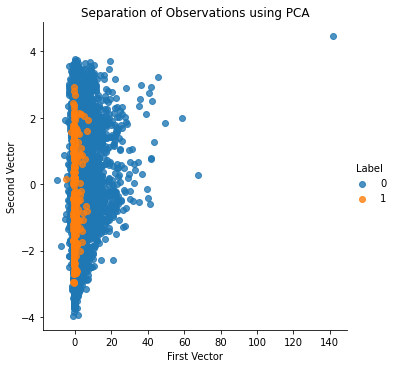

In [12]:
scatterPlot(X_train_PCA, y_train, "PCA")

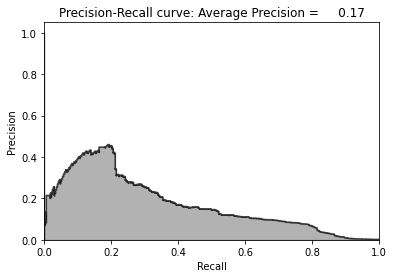

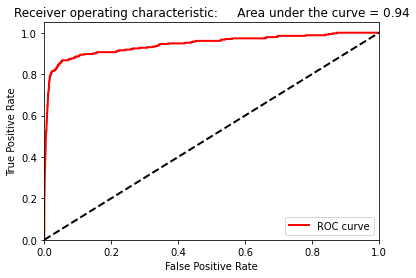

In [13]:
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
preds = plotResults(y_train, anomalyScoresPCA, True)

# PCA with 27 principal components
Investigating various values determined 27 gives best result.

In [14]:
#from sklearn.decomposition import PCA

n_components = 27
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, \
                                   index=X_train.index)

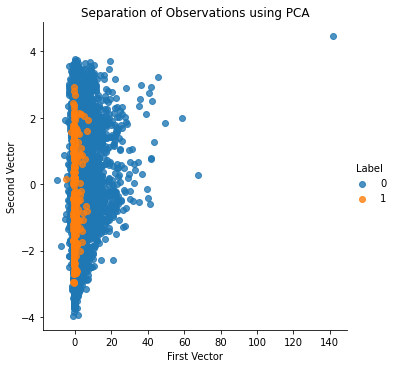

In [15]:
scatterPlot(X_train_PCA, y_train, "PCA")

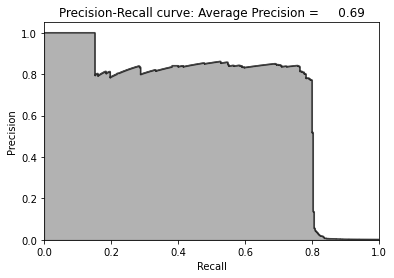

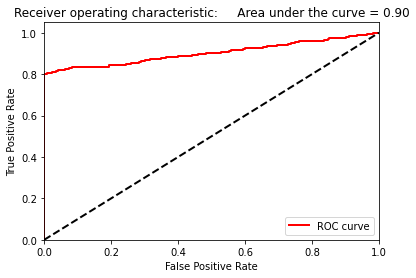

In [16]:
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
preds = plotResults(y_train, anomalyScoresPCA, True)

In [17]:
preds.sort_values(by="anomalyScore",ascending=False,inplace=True)
cutoff = 350
predsTop = preds[:cutoff]
print("Precision: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/cutoff,2))
print("Recall: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/y_train.sum(),2))
print("Fraud Caught out of 330 Cases:", predsTop.trueLabel.sum())

Precision:  0.75
Recall:  0.8
Fraud Caught out of 330 Cases: 264


# Sparse PCA
We need to specify the number of principal components we desire, but we must also set the alpha parameter, which controls the degree of sparsity. Experimentation with different values for these 2 parameters determined those used below gave best results.

Note that for normal PCA Scikit-Learn used a `fit_transform` function to generate the principal components and an `inverse_transform` function to reconstruct the original dimensions from the principal components. Using these two functions, we were able to calculate the reconstruction error between the original feature set and the reconstructed feature set derived from the PCA.

Unfortunately, Scikit-Learn does not provide an `inverse_transform` function for sparse PCA. Therefore, we must reconstruct the original dimensions after we perform sparse PCA ourselves.
##### results
results identical to PCA   
expected because normal and sparce are very similar, one is sparse representation of the other

In [18]:
#from sklearn.decomposition import SparsePCA

n_components = 27
alpha = 0.0001
random_state = 2018
n_jobs = -1

sparsePCA = SparsePCA(n_components=n_components, \
                alpha=alpha, random_state=random_state, n_jobs=n_jobs)

sparsePCA.fit(X_train.loc[:,:])
X_train_sparsePCA = sparsePCA.transform(X_train)
X_train_sparsePCA = pd.DataFrame(data=X_train_sparsePCA, index=X_train.index)

SparsePCA(alpha=0.0001, n_components=27, n_jobs=-1, random_state=2018)

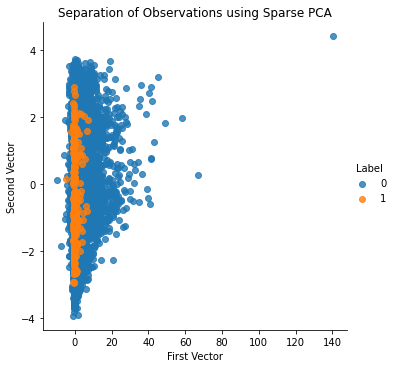

In [19]:
scatterPlot(X_train_sparsePCA, y_train, "Sparse PCA")

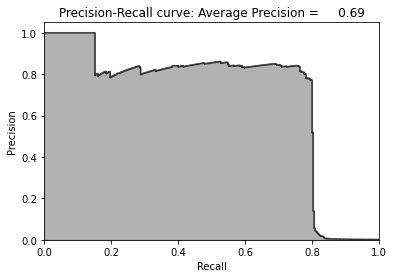

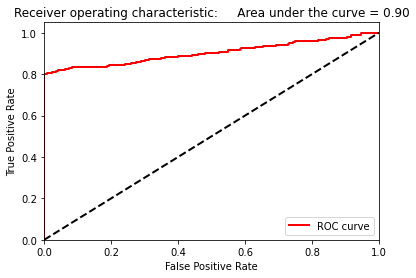

In [20]:
X_train_sparsePCA_inverse = np.array(X_train_sparsePCA). \
    dot(sparsePCA.components_) + np.array(X_train.mean(axis=0))
X_train_sparsePCA_inverse = \
    pd.DataFrame(data=X_train_sparsePCA_inverse, index=X_train.index)

anomalyScoresSparsePCA = anomalyScores(X_train, X_train_sparsePCA_inverse)
preds = plotResults(y_train, anomalyScoresSparsePCA, True)

# Kernel PCA
Now let’s design a fraud detection solution using kernel PCA, which is a nonlinear form of PCA and is useful if the fraud transactions are not linearly separable from the nonfraud transactions.

We need to specify the number of components we would like to generate, the `kernel` (we will use the RBF kernel as we did in the previous chapter), and the `gamma` (which is set to 1/n_features by default, so 1/30 in our case). We also need to set the `fit_inverse_transform` to true to apply the built-in `inverse_transform` function provided by Scikit-Learn.

Finally, because kernel PCA is so expensive to train with, we will train on just the first two thousand samples in the transactions dataset. This is not ideal but it is necessary to perform experiments quickly.

We will use this training to transform the entire training set and generate the principal components. Then, we will use the inverse_transform function to recreate the original dimension from the principal components derived by kernel PCA.
##### results 
this is not working--don't know why   
next cell will execute fine but 2 after that completely lock-up computer

#from sklearn.decomposition import KernelPCA

n_components = 27
kernel = 'rbf'
gamma = None
fit_inverse_transform = True
random_state = 2018
n_jobs = 1

kernelPCA = KernelPCA(n_components=n_components, kernel=kernel, \
                gamma=gamma, fit_inverse_transform= \
                fit_inverse_transform, n_jobs=n_jobs, \
                random_state=random_state)

kernelPCA.fit(X_train.iloc[:2000])
X_train_kernelPCA = kernelPCA.transform(X_train)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA, \
                                 index=X_train.index)

X_train_kernelPCA_inverse = kernelPCA.inverse_transform(X_train_kernelPCA)
X_train_kernelPCA_inverse = pd.DataFrame(data=X_train_kernelPCA_inverse, \
                                         index=X_train.index)

In [ ]:
# this cell just hangs; computer locks-up completely
#scatterPlot(X_train_kernelPCA, y_train, "Kernel PCA")

In [ ]:
# this cell just hangs; computer locks-up completely
#anomalyScoresKernelPCA = anomalyScores(X_train, X_train_kernelPCA_inverse)
#preds = plotResults(y_train, anomalyScoresKernelPCA, True)

# Gaussian Random Projection
Now, let’s try to develop a fraud detection solution using Gaussian random projection. Remember that we can set either the number of components we want or the `eps` parameter, which controls the quality of the embedding derived based on the Johnson–Lindenstrauss lemma.

We will choose to explicitly set the number of components. Gaussian random projection trains very quickly, so we can train on the entire training set.

As with sparse PCA, we will need to derive our own `inverse_transform` function because none is provided by Scikit-Learn.
##### results
these results are poor

In [21]:
#from sklearn.random_projection import GaussianRandomProjection

n_components = 27
eps = None
random_state = 2018

GRP = GaussianRandomProjection(n_components=n_components, \
                               eps=eps, random_state=random_state)

X_train_GRP = GRP.fit_transform(X_train)
X_train_GRP = pd.DataFrame(data=X_train_GRP, index=X_train.index)

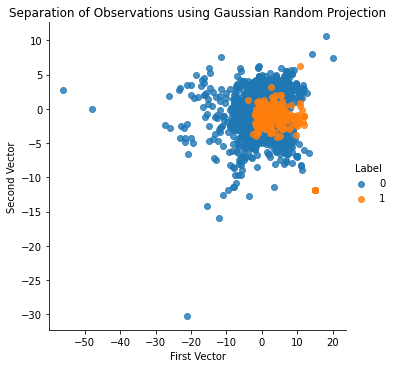

In [22]:
scatterPlot(X_train_GRP, y_train, "Gaussian Random Projection")

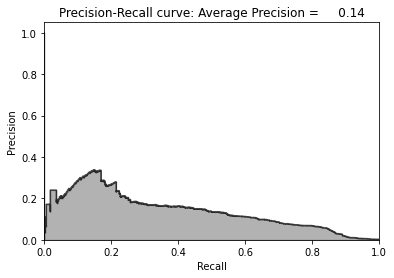

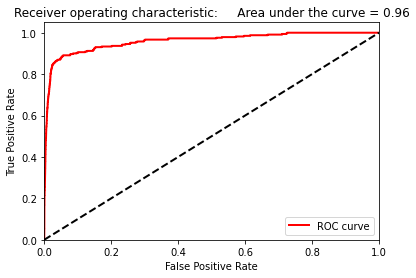

In [23]:
X_train_GRP_inverse = np.array(X_train_GRP).dot(GRP.components_)
X_train_GRP_inverse = pd.DataFrame(data=X_train_GRP_inverse, \
                                   index=X_train.index)

anomalyScoresGRP = anomalyScores(X_train, X_train_GRP_inverse)
preds = plotResults(y_train, anomalyScoresGRP, True)

# Sparse Random Projection
We will designate the number of components we want (instead of setting the eps parameter). And, like with Gaussian random projection, we will use our own `inverse_transform` function to create the original dimensions from the sparse random projection-derived components.
##### results
these results are poor

In [24]:
#from sklearn.random_projection import SparseRandomProjection

n_components = 27
density = 'auto'
eps = .01
dense_output = True
random_state = 2018

SRP = SparseRandomProjection(n_components=n_components, \
        density=density, eps=eps, dense_output=dense_output, \
                                random_state=random_state)

X_train_SRP = SRP.fit_transform(X_train)
X_train_SRP = pd.DataFrame(data=X_train_SRP, index=X_train.index)

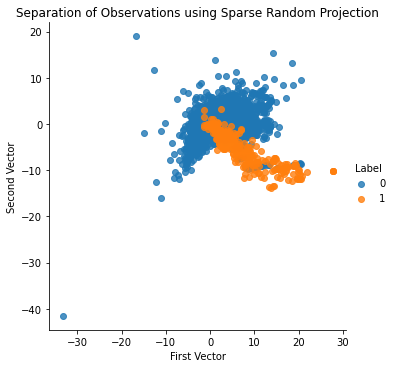

In [25]:
scatterPlot(X_train_SRP, y_train, "Sparse Random Projection")

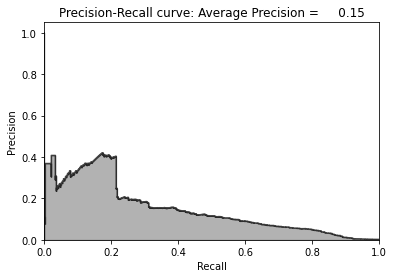

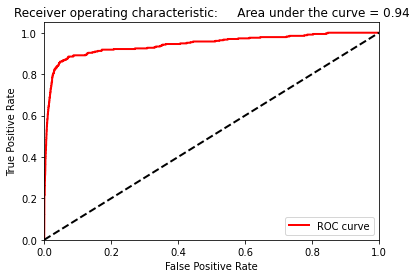

In [26]:
X_train_SRP_inverse = np.array(X_train_SRP).dot(SRP.components_.todense())
X_train_SRP_inverse = pd.DataFrame(data=X_train_SRP_inverse, index=X_train.index)

anomalyScoresSRP = anomalyScores(X_train, X_train_SRP_inverse)
plotResults(y_train, anomalyScoresSRP)

# Summary
So far, we have developed fraud detection solutions using linear dimensionality reduction methods such as normal PCA, sparse PCA, Gaussian random projection, and sparse random projection. We also developed a solution using the nonlinear version of PCA—kernel PCA.

At this point, PCA is by far the best solution.

We could turn to nonlinear dimensionality reduction algorithms, but the open source versions of these algorithms run very slowly and are not viable for fast fraud detection. Therefore, we will skip this and go directly to nondistance-based dimensionality reduction methods: dictionary learning and independent component analysis.

# Mini-batch dictionary learning
In dictionary learning, the algorithm learns the sparse representation of the original data. Using the vectors in the learned dictionary, each instance in the original data can be reconstructed as a weighted sum of these learned vectors.

For anomaly detection, we want to learn an undercomplete dictionary so that the vectors in the dictionary are fewer in number than the original dimensions. With this constraint, it will be easier to reconstruct the more frequently occurring normal transactions and much more difficult to construct the rarer fraud transactions.

In our case, we will generate 28 vectors (or components). To learn the dictionary, we will feed in 10 batches, where each batch has 200 samples.

We will need to use our own `inverse_transform` function.   
##### results
Much better than those for kernal PCA, Gaussian random projection, and sparse random projection but are no match for those of normal PCA.

In [27]:
#from sklearn.decomposition import MiniBatchDictionaryLearning

n_components = 28
alpha = 1
batch_size = 200
n_iter = 10
random_state = 2018

miniBatchDictLearning = MiniBatchDictionaryLearning( \
    n_components=n_components, alpha=alpha, batch_size=batch_size, \
    n_iter=n_iter, random_state=random_state)

miniBatchDictLearning.fit(X_train)
X_train_miniBatchDictLearning = \
    miniBatchDictLearning.fit_transform(X_train)
X_train_miniBatchDictLearning = \
    pd.DataFrame(data=X_train_miniBatchDictLearning, index=X_train.index)

MiniBatchDictionaryLearning(batch_size=200, n_components=28, n_iter=10,
                            random_state=2018)

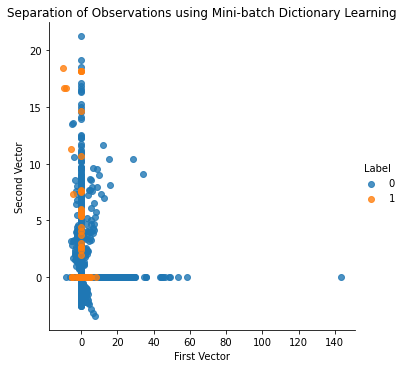

In [28]:
scatterPlot(X_train_miniBatchDictLearning, y_train, \
            "Mini-batch Dictionary Learning")

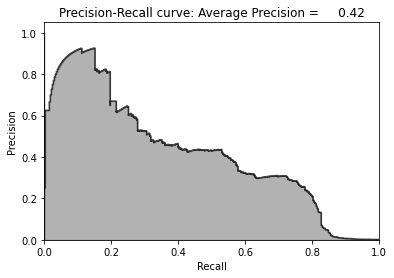

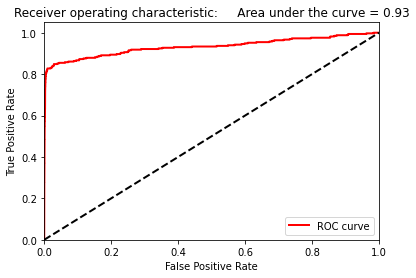

In [29]:
X_train_miniBatchDictLearning_inverse = \
    np.array(X_train_miniBatchDictLearning). \
    dot(miniBatchDictLearning.components_)

X_train_miniBatchDictLearning_inverse = \
    pd.DataFrame(data=X_train_miniBatchDictLearning_inverse, \
                 index=X_train.index)

anomalyScoresMiniBatchDictLearning = anomalyScores(X_train, \
    X_train_miniBatchDictLearning_inverse)
preds = plotResults(y_train, anomalyScoresMiniBatchDictLearning, True)

# Independent Component Analysis
##### results
Identical to those of normal PCA

In [30]:
#from sklearn.decomposition import FastICA

n_components = 27
algorithm = 'parallel'
whiten = True
max_iter = 200
random_state = 2018

fastICA = FastICA(n_components=n_components, \
    algorithm=algorithm, whiten=whiten, max_iter=max_iter, \
    random_state=random_state)

X_train_fastICA = fastICA.fit_transform(X_train)
X_train_fastICA = pd.DataFrame(data=X_train_fastICA, index=X_train.index)

X_train_fastICA_inverse = fastICA.inverse_transform(X_train_fastICA)
X_train_fastICA_inverse = pd.DataFrame(data=X_train_fastICA_inverse, \
                                       index=X_train.index)

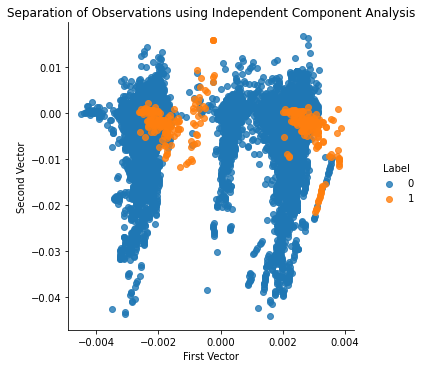

In [31]:
scatterPlot(X_train_fastICA, y_train, "Independent Component Analysis")

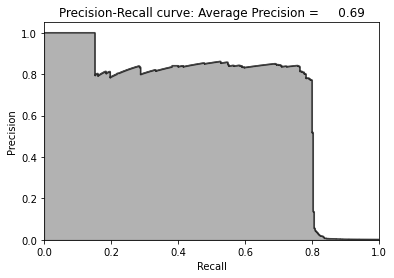

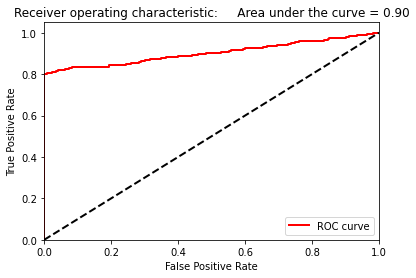

In [32]:
anomalyScoresFastICA = anomalyScores(X_train, X_train_fastICA_inverse)
plotResults(y_train, anomalyScoresFastICA)

# Evaluate on test set
Now, to evaluate our fraud detection solutions, let’s apply them to the never-before-seen test set. We will do this for the top three solutions we’ve developed: normal PCA, ICA, and dictionary learning. We will not use sparse PCA because it is very similar to the normal PCA solution.

### PCA on Test Set
We will use the PCA embedding that the PCA algorithm learned from the training set and use this to transform the test set. We will then use the Scikit-Learn `inverse_transform` function to recreate the original dimensions from the principal components matrix of the test set.

By comparing the original test set matrix with the newly reconstructed one, we can calculate the anomaly scores 

In [33]:
X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(data=X_test_PCA, index=X_test.index)

X_test_PCA_inverse = pca.inverse_transform(X_test_PCA)
X_test_PCA_inverse = pd.DataFrame(data=X_test_PCA_inverse, \
                                  index=X_test.index)

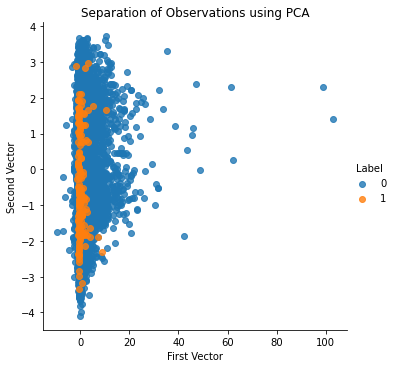

In [34]:
scatterPlot(X_test_PCA, y_test, "PCA")

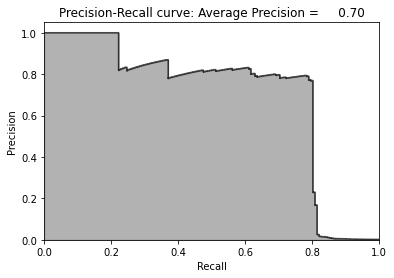

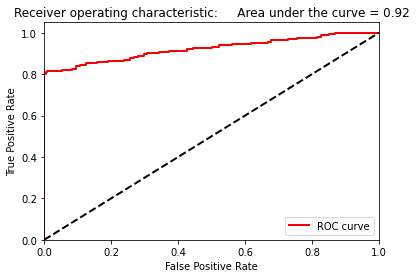

In [35]:
anomalyScoresPCA = anomalyScores(X_test, X_test_PCA_inverse)
preds = plotResults(y_test, anomalyScoresPCA, True)

### ICA on Test Set
##### results
same as PCA

In [36]:
X_test_fastICA = fastICA.transform(X_test)
X_test_fastICA = pd.DataFrame(data=X_test_fastICA, index=X_test.index)

X_test_fastICA_inverse = fastICA.inverse_transform(X_test_fastICA)
X_test_fastICA_inverse = pd.DataFrame(data=X_test_fastICA_inverse, \
                                      index=X_test.index)

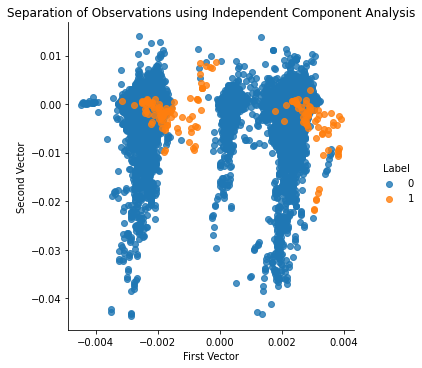

In [37]:
scatterPlot(X_test_fastICA, y_test, "Independent Component Analysis")

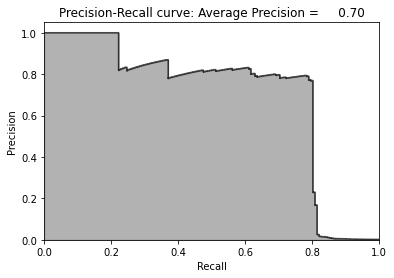

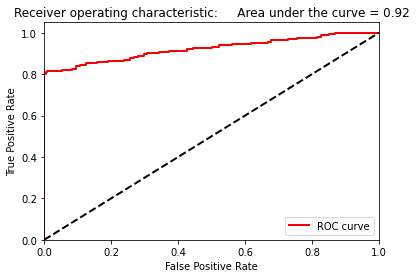

In [38]:
anomalyScoresFastICA = anomalyScores(X_test, X_test_fastICA_inverse)
plotResults(y_test, anomalyScoresFastICA)

### Dictionary learning on Test Set
##### results
While the results are not terrible—we can catch 80% of the fraud with a 20% precision—they fall far short of the results from normal PCA and ICA.

In [39]:
X_test_miniBatchDictLearning = miniBatchDictLearning.transform(X_test)
X_test_miniBatchDictLearning = \
    pd.DataFrame(data=X_test_miniBatchDictLearning, index=X_test.index)

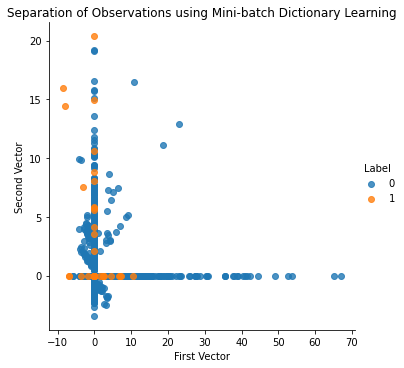

In [40]:
scatterPlot(X_test_miniBatchDictLearning, y_test, \
            "Mini-batch Dictionary Learning")

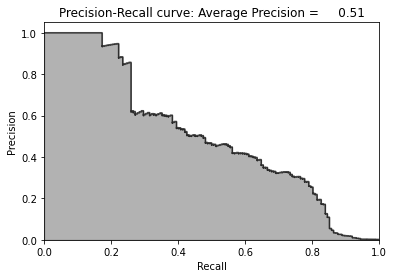

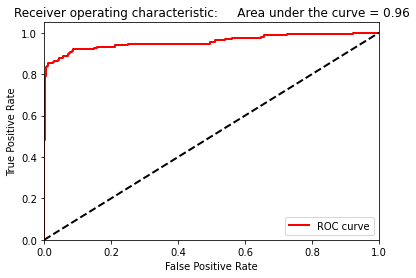

In [41]:
X_test_miniBatchDictLearning_inverse = \
    np.array(X_test_miniBatchDictLearning). \
    dot(miniBatchDictLearning.components_)

X_test_miniBatchDictLearning_inverse = \
    pd.DataFrame(data=X_test_miniBatchDictLearning_inverse, \
                 index=X_test.index)

anomalyScoresMiniBatchDictLearning = anomalyScores(X_test, \
    X_test_miniBatchDictLearning_inverse)
preds = plotResults(y_test, anomalyScoresMiniBatchDictLearning, True)

# Conclusion
While not all the dimensionality reduction algorithms performed well on this credit card transactions dataset, two performed remarkably well—normal PCA and ICA.

Normal PCA and ICA caught over 80% of the known fraud with an 80% precision. By comparison, the best-performing supervised learning-based fraud detection system from Chapter 2 caught nearly 90% of the known fraud with an 80% precision. The unsupervised fraud detection system is only marginally worse than the supervised system at catching known patterns of fraud.

Recall that unsupervised fraud detection systems require no labels for training, adapt well to changing fraud patterns, and can catch fraud that had gone previously undiscovered. Given these additional advantages, the unsupervised learning-based solution will generally perform better than the supervised learning-based solution at catching known and unknown or newly emerging patterns of fraud in the future, although using both in tandem is best.